<a href="https://colab.research.google.com/github/roy-sub/Time-Series-Air-Quality-Index-Prediction-and-Analysis-using-Multiple-Deep-Learning-Models/blob/main/LSTM_BiLSTM_BiLSTMCNN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Data Preprocessing -**

In [ ]:
import pandas as pd
import numpy as np
from math import sqrt
import seaborn as sns;
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras import optimizers
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.layers import Dropout
# import tensorflow.keras.backend as K 

In [10]:
# 321300
df = pd.read_csv('/content/dataset')
df.shape

(401611, 15)

In [11]:
df.head()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,AQI_calculated,datetime
0,13.0,16.0,8.0,11.2000,800.0,90.0,6.3,1023.5,-19.3,0.0,1,2.7,5,5494.0,2013-03-01-15
1,11.0,22.0,6.0,15.4000,800.0,90.0,5.9,1023.6,-18.8,0.0,1,1.8,5,5494.0,2013-03-01-16
2,10.0,20.0,4.0,9.8000,800.0,87.0,5.1,1024.2,-18.7,0.0,14,1.0,5,5494.0,2013-03-01-17
3,11.0,20.0,6.0,12.6000,900.0,80.0,3.7,1025.3,-19.2,0.0,0,1.6,5,5494.0,2013-03-01-18
4,11.0,31.0,8.0,12.0053,1000.0,69.0,2.7,1026.1,-19.3,0.0,0,1.7,5,6082.0,2013-03-01-19


In [12]:
train = df[:321301]
test = df[321301:401612]

In [13]:
train.head()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,AQI_calculated,datetime
0,13.0,16.0,8.0,11.2000,800.0,90.0,6.3,1023.5,-19.3,0.0,1,2.7,5,5494.0,2013-03-01-15
1,11.0,22.0,6.0,15.4000,800.0,90.0,5.9,1023.6,-18.8,0.0,1,1.8,5,5494.0,2013-03-01-16
2,10.0,20.0,4.0,9.8000,800.0,87.0,5.1,1024.2,-18.7,0.0,14,1.0,5,5494.0,2013-03-01-17
3,11.0,20.0,6.0,12.6000,900.0,80.0,3.7,1025.3,-19.2,0.0,0,1.6,5,5494.0,2013-03-01-18
4,11.0,31.0,8.0,12.0053,1000.0,69.0,2.7,1026.1,-19.3,0.0,0,1.7,5,6082.0,2013-03-01-19


In [14]:
test.head()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,AQI_calculated,datetime
321301,134.0,151.0,14.0,42.0,1200.0,52.0,24.8,1002.1,18.0,0.0,13,2.9,11,7259.0,2015-06-24-08
321302,138.0,141.0,17.0,38.0,1300.0,62.0,25.6,1001.8,18.0,0.0,15,2.9,11,7847.0,2015-06-24-09
321303,130.0,134.0,16.0,35.0,1200.0,75.0,25.8,1001.9,17.7,0.0,15,2.6,11,7847.0,2015-06-24-10
321304,105.0,154.0,12.0,42.0,1200.0,66.0,25.5,1002.1,18.4,0.0,15,2.1,11,7847.0,2015-06-24-11
321305,118.0,128.0,8.0,50.0,1300.0,53.0,25.5,1001.9,18.4,0.0,15,1.5,11,7847.0,2015-06-24-12


In [15]:
# Set data_time column as index as it is needed for RNN # (7111, 11) -> (321301, 14)
train = train.set_index("datetime").copy()
print(train.shape)

(321301, 14)


In [16]:
test = test.set_index("datetime").copy()
print(test.shape)

(80310, 14)


In [17]:
train.head()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,AQI_calculated
datetime,,,,,,,,,,,,,,
2013-03-01-15,13.0,16.0,8.0,11.2000,800.0,90.0,6.3,1023.5,-19.3,0.0,1,2.7,5,5494.0
2013-03-01-16,11.0,22.0,6.0,15.4000,800.0,90.0,5.9,1023.6,-18.8,0.0,1,1.8,5,5494.0
2013-03-01-17,10.0,20.0,4.0,9.8000,800.0,87.0,5.1,1024.2,-18.7,0.0,14,1.0,5,5494.0
2013-03-01-18,11.0,20.0,6.0,12.6000,900.0,80.0,3.7,1025.3,-19.2,0.0,0,1.6,5,5494.0
2013-03-01-19,11.0,31.0,8.0,12.0053,1000.0,69.0,2.7,1026.1,-19.3,0.0,0,1.7,5,6082.0


In [18]:
test.head()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,AQI_calculated
datetime,,,,,,,,,,,,,,
2015-06-24-08,134.0,151.0,14.0,42.0,1200.0,52.0,24.8,1002.1,18.0,0.0,13,2.9,11,7259.0
2015-06-24-09,138.0,141.0,17.0,38.0,1300.0,62.0,25.6,1001.8,18.0,0.0,15,2.9,11,7847.0
2015-06-24-10,130.0,134.0,16.0,35.0,1200.0,75.0,25.8,1001.9,17.7,0.0,15,2.6,11,7847.0
2015-06-24-11,105.0,154.0,12.0,42.0,1200.0,66.0,25.5,1002.1,18.4,0.0,15,2.1,11,7847.0
2015-06-24-12,118.0,128.0,8.0,50.0,1300.0,53.0,25.5,1001.9,18.4,0.0,15,1.5,11,7847.0


In [19]:
target_cols = ['AQI_calculated']
feat_cols = [col for col in train.columns if col not in target_cols]
print(target_cols)
print(feat_cols)

['AQI_calculated']
['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station']


In [20]:
test = pd.concat([train.drop(target_cols[:], axis=1).iloc[-10:-1], test])
test.head()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,AQI_calculated
datetime,,,,,,,,,,,,,,
2015-06-23-22,80.0,127.0,7.0,28.0,700.0,138.0,28.7,1002.2,17.2,0.0,11,2.2,11,NaN
2015-06-23-23,120.0,169.0,12.0,28.0,900.0,146.0,28.1,1002.1,17.9,0.0,12,2.3,11,NaN
2015-06-24-00,140.0,193.0,18.0,26.0,1100.0,149.0,27.7,1002.0,18.4,0.0,11,1.8,11,NaN
2015-06-24-01,150.0,205.0,18.0,28.0,1200.0,124.0,27.1,1002.0,18.7,0.0,12,3.5,11,NaN
2015-06-24-02,125.0,125.0,13.0,24.0,800.0,102.0,26.4,1001.7,16.9,0.0,11,3.5,11,NaN


In [21]:
test = test.drop(['AQI_calculated'], axis=1)
test.head()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
datetime,,,,,,,,,,,,,
2015-06-23-22,80.0,127.0,7.0,28.0,700.0,138.0,28.7,1002.2,17.2,0.0,11,2.2,11
2015-06-23-23,120.0,169.0,12.0,28.0,900.0,146.0,28.1,1002.1,17.9,0.0,12,2.3,11
2015-06-24-00,140.0,193.0,18.0,26.0,1100.0,149.0,27.7,1002.0,18.4,0.0,11,1.8,11
2015-06-24-01,150.0,205.0,18.0,28.0,1200.0,124.0,27.1,1002.0,18.7,0.0,12,3.5,11
2015-06-24-02,125.0,125.0,13.0,24.0,800.0,102.0,26.4,1001.7,16.9,0.0,11,3.5,11


In [22]:
from sklearn.model_selection import train_test_split
train, val = train_test_split(train, test_size=0.2, random_state=42)

In [23]:
from sklearn.preprocessing import MinMaxScaler

fea_scaler = MinMaxScaler()
lab_scaler = MinMaxScaler()

Xtrain_scaled = fea_scaler.fit_transform(train.drop(target_cols[:],axis=1))
Xval_scaled = fea_scaler.transform(val.drop(target_cols[:],axis=1))
Ytrain_scaled =lab_scaler.fit_transform(train[target_cols[:]])
Yval_scaled =lab_scaler.transform(val[target_cols[:]])
Xtest_scaled = fea_scaler.transform(test)

In [24]:
print(Yval_scaled)

[[0.12121368]
 [0.05050141]
 [0.07071227]
 ...
 [0.06061543]
 [0.09899375]
 [0.01009685]]


In [25]:
print(Xtrain_scaled)

[[0.31836735 0.11534604 0.00743305 ... 0.8125     0.0530303  1.        ]
 [0.05306122 0.05315948 0.00343076 ... 0.4375     0.14393939 0.4       ]
 [0.05714286 0.03009027 0.05546048 ... 0.375      0.06060606 0.1       ]
 ...
 [0.06530612 0.01604814 0.00743305 ... 0.875      0.48484848 0.        ]
 [0.68163265 0.17251755 0.08947991 ... 0.125      0.21212121 0.2       ]
 [0.14285714 0.03510532 0.0054319  ... 0.5        0.13636364 0.        ]]


In [26]:
length = 10 # use 50 observation to test_generator 51
batch_size = 64 # usually this batch size works well

In [27]:
train_dataset = tf.keras.preprocessing.timeseries_dataset_from_array(
    Xtrain_scaled,
    targets=Ytrain_scaled,
    sequence_length=length,
    batch_size=batch_size,
    shuffle=True,
    start_index=0).prefetch(64)
val_dataset = tf.keras.preprocessing.timeseries_dataset_from_array(
    Xval_scaled,
    targets=Yval_scaled,
    sequence_length=length,
    batch_size=batch_size,
    shuffle=True,
    start_index=0).prefetch(64)
test[target_cols[:]] = 0
test_dataset = tf.keras.preprocessing.timeseries_dataset_from_array(
    Xtest_scaled,
    targets=test[target_cols[:]],
    sequence_length=length,
    batch_size=batch_size,
    shuffle=True,
    start_index=0).prefetch(64)
print(train[target_cols[:]].shape) # (5688, 3) -> (257040, 1)

(257040, 1)


In [28]:
n_features = Xtrain_scaled.shape[1]
print(n_features)

13


In [29]:
import tensorflow.keras.backend as K

In [30]:
def rmsle_custom(y_true, y_pred):
    msle = tf.keras.losses.MeanSquaredLogarithmicError()
    return K.sqrt(msle(y_true, y_pred))


es = tf.keras.callbacks.EarlyStopping(monitor='val_rmsle_custom', 
                                      mode='min',patience=4, 
                                      restore_best_weights=True)

plateau = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                               factor=0.5,
                                               patience=3,
                                               verbose=1,
                                               mode="auto",
                                               min_delta=0.0001,
                                               cooldown=0,
                                               min_lr=0.000001,)

weights_initializer = tf.keras.initializers.RandomNormal(mean=0., stddev=1., seed=45)

In [31]:
msle = tf.keras.losses.MeanSquaredLogarithmicError()
mae = tf.keras.losses.MeanAbsoluteError()
mse = tf.keras.losses.MeanSquaredError()
rmse = tf.keras.metrics.RootMeanSquaredError()
from sklearn.metrics import r2_score

In [32]:
print(Yval_scaled.shape)

(64261, 1)


#**LSTM I**

In [ ]:
# design network : LSTM
model = Sequential()
model.add(LSTM(128, batch_input_shape=(batch_size,length, n_features)))
model.add(Dense(50, activation='tanh'))
model.add(Dense(1))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (64, 128)                 72704     
                                                                 
 dense_2 (Dense)             (64, 50)                  6450      
                                                                 
 dense_3 (Dense)             (64, 1)                   51        
                                                                 
Total params: 79,205
Trainable params: 79,205
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                  loss=tf.keras.losses.mean_squared_error,
                  metrics=[rmsle_custom, msle, mae, mse, rmse])

In [ ]:
hist = model.fit(train_dataset,
                        validation_data = val_dataset, 
                        epochs=50,
                        callbacks=[es,plateau],
                        verbose=1)

Epoch 1/50
4017/4017 [==============================] - 62s 15ms/step - loss: 0.0067 - rmsle_custom: 0.0581 - mean_squared_logarithmic_error: 0.0037 - mean_absolute_error: 0.0487 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0787 - val_loss: 0.0045 - val_rmsle_custom: 0.0527 - val_mean_squared_logarithmic_error: 0.0029 - val_mean_absolute_error: 0.0411 - val_mean_squared_error: 0.0045 - val_root_mean_squared_error: 0.0673 - lr: 0.0100
Epoch 2/50
4017/4017 [==============================] - 59s 15ms/step - loss: 0.0058 - rmsle_custom: 0.0549 - mean_squared_logarithmic_error: 0.0034 - mean_absolute_error: 0.0458 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0763 - val_loss: 0.0045 - val_rmsle_custom: 0.0527 - val_mean_squared_logarithmic_error: 0.0029 - val_mean_absolute_error: 0.0433 - val_mean_squared_error: 0.0045 - val_root_mean_squared_error: 0.0669 - lr: 0.0100
Epoch 3/50
4017/4017 [==============================] - 60s 15ms/step - loss: 0.0046 - rmsle_custo

In [ ]:
yhat = model.predict(val_dataset)
for i in range(5):
    print(yhat[i])

1004/1004 [==============================] - 10s 9ms/step
[0.13424833]
[0.17483263]
[0.23123343]
[0.07903694]
[0.18872756]


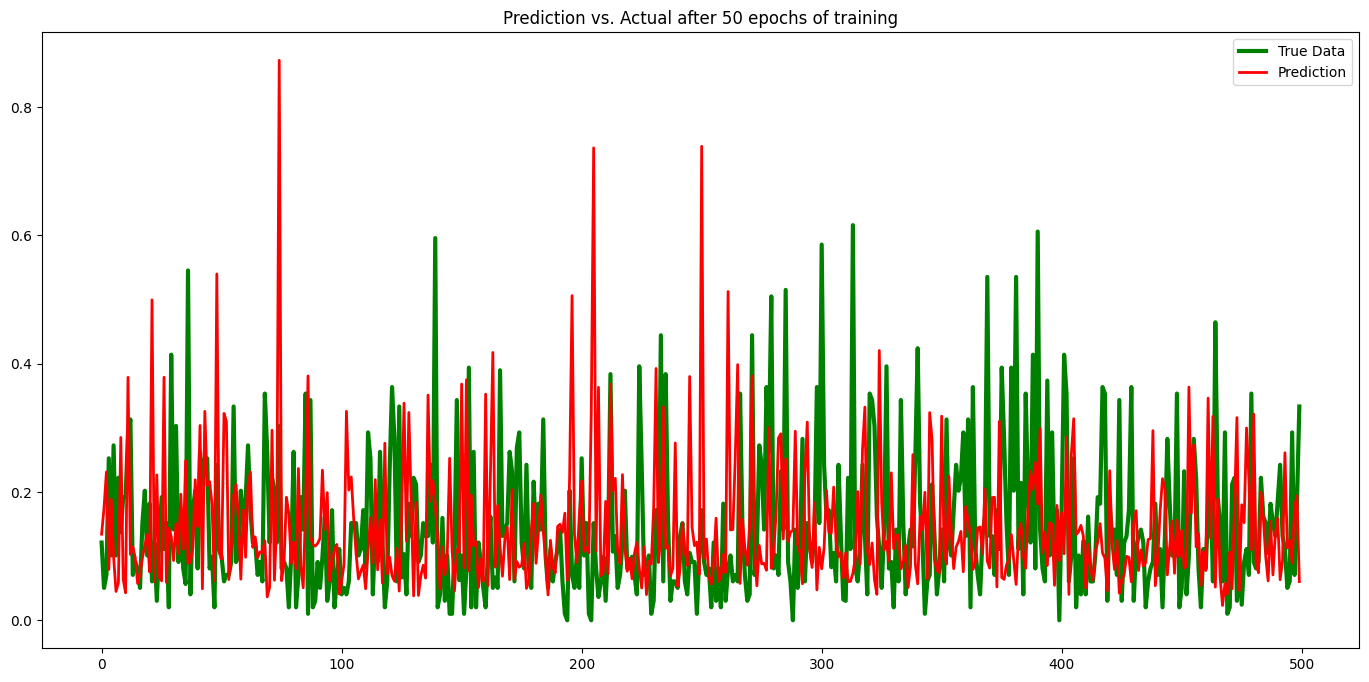

In [ ]:
def plot_predicted(predicted_data, true_data):
    fig, ax = plt.subplots(figsize=(17,8))
    ax.set_title('Prediction vs. Actual after 50 epochs of training')
    ax.plot(true_data, label='True Data', color='green', linewidth='3')

    ax.plot(predicted_data, label='Prediction', color='red', linewidth='2')
    plt.legend()
    plt.show()

plot_predicted(yhat[:500,], Yval_scaled[:500,])

In [ ]:
import math
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(Yval_scaled[:64252,], yhat[:64252,])
rmsle = rmsle_custom(Yval_scaled[:64252,], yhat[:64252,])
msle = mean_squared_log_error(Yval_scaled[:64252,], yhat[:64252,])
mae = mean_absolute_error(Yval_scaled[:64252,], yhat[:64252,])
rmse = math.sqrt(mse)

print('Mean Squared Error: %.5f' % mse)
print('Root Mean Squared Logarithmic Error: %.5f' % msle)
print('Mean Squared Logarithmic Error: %.5f' % msle)
print('Mean Absolute Error: %.5f' % mae)
print('Root Mean Squared Error: %.5f' % rmse)

Mean Squared Error: 0.02184
Root Mean Squared Logarithmic Error: 0.01455
Mean Squared Logarithmic Error: 0.01455
Mean Absolute Error: 0.10525
Root Mean Squared Error: 0.14777


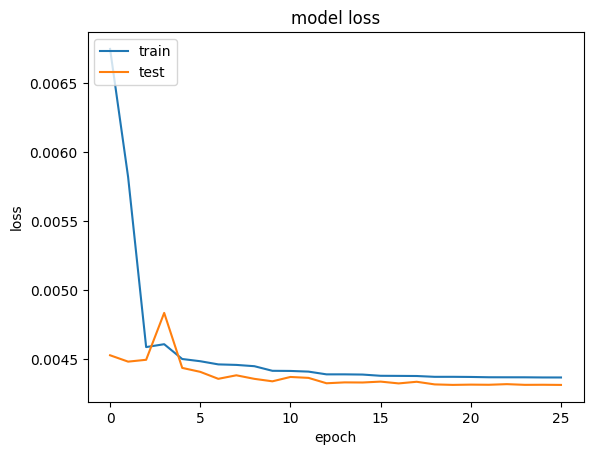

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

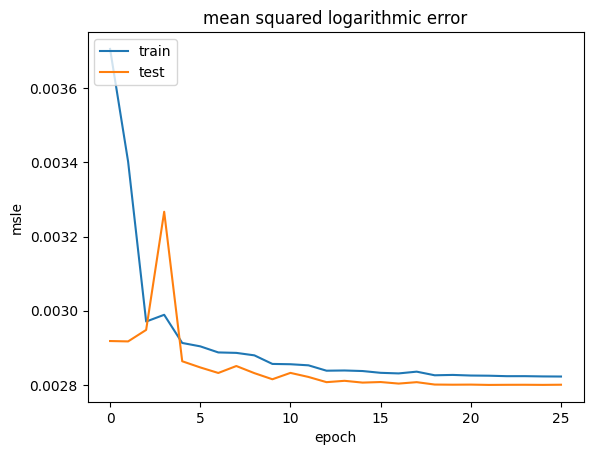

In [ ]:
plt.plot(hist.history['mean_squared_logarithmic_error'])
plt.plot(hist.history['val_mean_squared_logarithmic_error'])
plt.title('mean squared logarithmic error')
plt.ylabel('msle')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

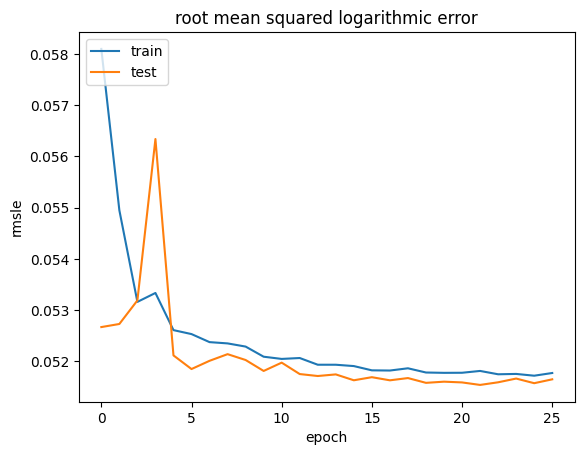

In [ ]:
plt.plot(hist.history['rmsle_custom'])
plt.plot(hist.history['val_rmsle_custom'])
plt.title('root mean squared logarithmic error')
plt.ylabel('rmsle')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

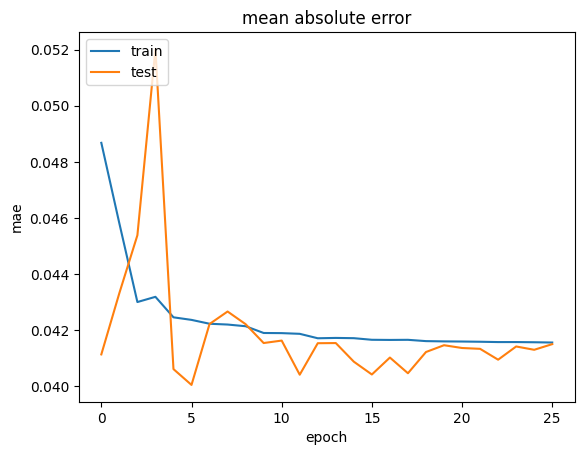

In [ ]:
plt.plot(hist.history['mean_absolute_error'])
plt.plot(hist.history['val_mean_absolute_error'])
plt.title('mean absolute error')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

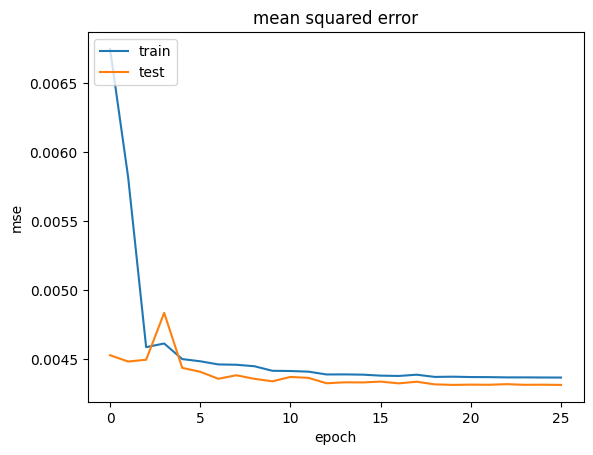

In [ ]:
plt.plot(hist.history['mean_squared_error'])
plt.plot(hist.history['val_mean_squared_error'])
plt.title('mean squared error')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

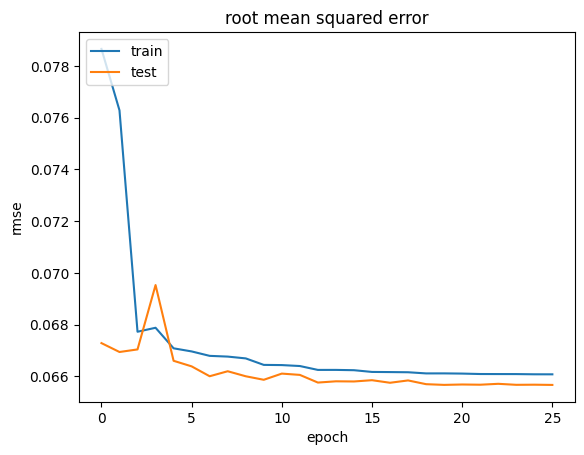

In [ ]:
plt.plot(hist.history['root_mean_squared_error'])
plt.plot(hist.history['val_root_mean_squared_error'])
plt.title('root mean squared error')
plt.ylabel('rmse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#**BiLSTM -**

In [ ]:
model_BiLSTM = tf.keras.Sequential([
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(100,  return_sequences=True), batch_input_shape=(batch_size,length, n_features)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(100, return_sequences=False)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(1)
])

model_BiLSTM.compile(optimizer=tf.keras.optimizers.Nadam(learning_rate=0.001),loss=tf.losses.MeanSquaredLogarithmicError(), metrics=[rmsle_custom, msle, mae, mse, rmse])
model_BiLSTM.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (64, 10, 200)            91200     
 l)                                                              
                                                                 
 dropout_4 (Dropout)         (64, 10, 200)             0         
                                                                 
 bidirectional_1 (Bidirectio  (64, 200)                240800    
 nal)                                                            
                                                                 
 dropout_5 (Dropout)         (64, 200)                 0         
                                                                 
 dense_4 (Dense)             (64, 1)                   201       
                                                                 
Total params: 332,201
Trainable params: 332,201
Non-tr

In [ ]:
hist_BiLSTM = model_BiLSTM.fit(train_dataset,
                        validation_data = val_dataset, 
                        epochs=50,
                        callbacks=[es,plateau],
                        verbose=1)

Epoch 1/50
4017/4017 [==============================] - 91s 20ms/step - loss: 0.0034 - rmsle_custom: 0.0568 - mean_squared_logarithmic_error: 0.0034 - mean_absolute_error: 0.0463 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0713 - val_loss: 0.0029 - val_rmsle_custom: 0.0526 - val_mean_squared_logarithmic_error: 0.0029 - val_mean_absolute_error: 0.0404 - val_mean_squared_error: 0.0045 - val_root_mean_squared_error: 0.0673 - lr: 0.0010
Epoch 2/50
4017/4017 [==============================] - 81s 20ms/step - loss: 0.0030 - rmsle_custom: 0.0531 - mean_squared_logarithmic_error: 0.0030 - mean_absolute_error: 0.0424 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0678 - val_loss: 0.0029 - val_rmsle_custom: 0.0521 - val_mean_squared_logarithmic_error: 0.0029 - val_mean_absolute_error: 0.0403 - val_mean_squared_error: 0.0044 - val_root_mean_squared_error: 0.0667 - lr: 0.0010
Epoch 3/50
4017/4017 [==============================] - 80s 20ms/step - loss: 0.0029 - rmsle_custo

In [ ]:
yhat_BiLSTM = model_LSTM.predict(val_dataset)
for i in range(5):
    print(yhat_LSTM[i])

1004/1004 [==============================] - 27s 27ms/step
[0.25438124]
[0.588192]
[0.11384951]
[0.03616158]
[0.0488412]


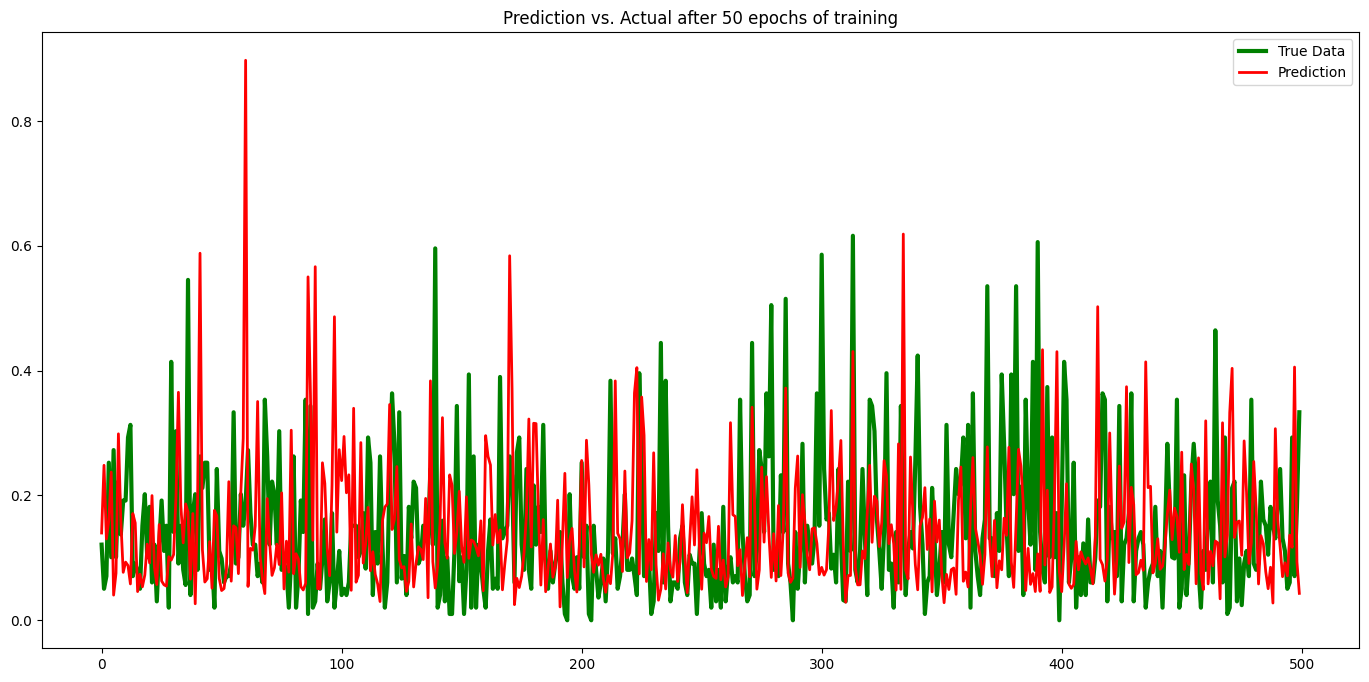

In [ ]:
def plot_predicted(predicted_data, true_data):
    fig, ax = plt.subplots(figsize=(17,8))
    ax.set_title('Prediction vs. Actual after 50 epochs of training')
    ax.plot(true_data, label='True Data', color='green', linewidth='3')

    ax.plot(predicted_data, label='Prediction', color='red', linewidth='2')
    plt.legend()
    plt.show()

plot_predicted(yhat_BiLSTM[:500,], Yval_scaled[:500,])

In [ ]:
print(Yval_scaled.shape)
print(yhat_BiLSTM.shape)

(64261, 1)
(64252, 1)


In [ ]:
import math
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(Yval_scaled[:64252,], yhat_BiLSTM[:64252,])
rmsle = rmsle_custom(Yval_scaled[:64252,], yhat_BiLSTM[:64252,])
msle = mean_squared_log_error(Yval_scaled[:64252,], yhat_BiLSTM[:64252,])
mae = mean_absolute_error(Yval_scaled[:64252,], yhat_BiLSTM[:64252,])
rmse = math.sqrt(mse)

print('Mean Squared Error: %.5f' % mse)
print('Root Mean Squared Logarithmic Error: %.5f' % msle)
print('Mean Squared Logarithmic Error: %.5f' % msle)
print('Mean Absolute Error: %.5f' % mae)
print('Root Mean Squared Error: %.5f' % rmse)

Mean Squared Error: 0.02193
Root Mean Squared Logarithmic Error: 0.01467
Mean Squared Logarithmic Error: 0.01467
Mean Absolute Error: 0.10538
Root Mean Squared Error: 0.14808


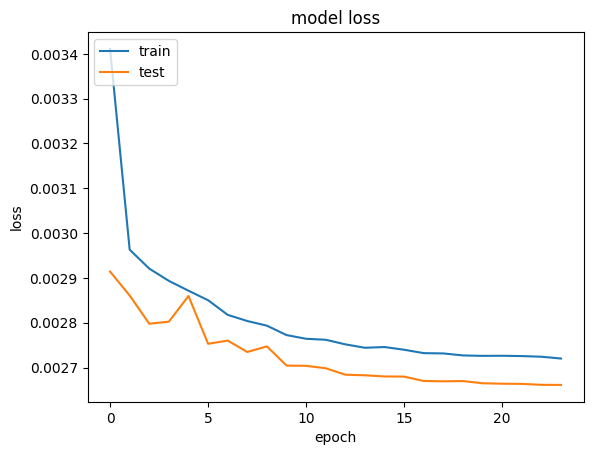

In [ ]:
plt.plot(hist_BiLSTM.history['loss'])
plt.plot(hist_BiLSTM.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

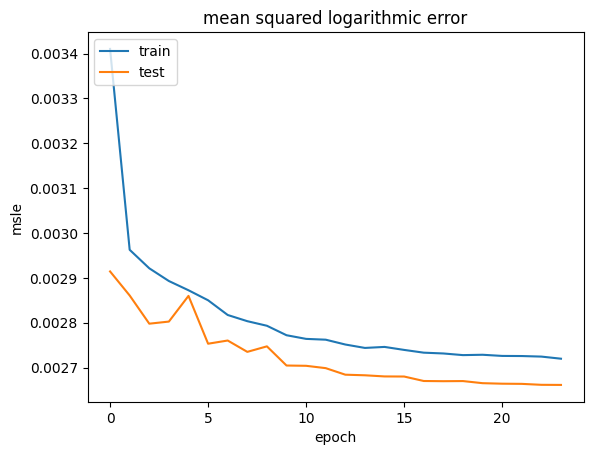

In [ ]:
plt.plot(hist_BiLSTM.history['mean_squared_logarithmic_error'])
plt.plot(hist_BiLSTM.history['val_mean_squared_logarithmic_error'])
plt.title('mean squared logarithmic error')
plt.ylabel('msle')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

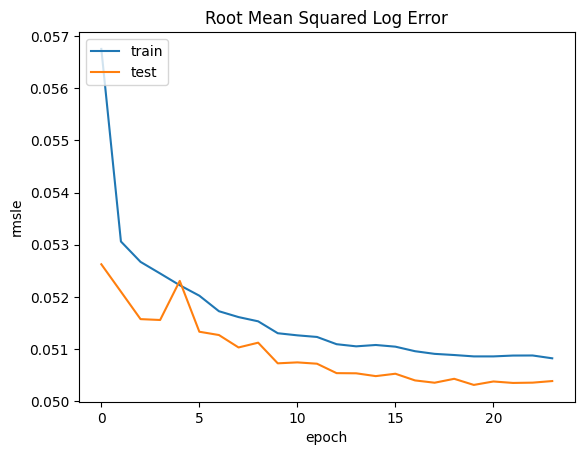

In [ ]:
plt.plot(hist_BiLSTM.history['rmsle_custom'])
plt.plot(hist_BiLSTM.history['val_rmsle_custom'])
plt.title('Root Mean Squared Log Error')
plt.ylabel('rmsle')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

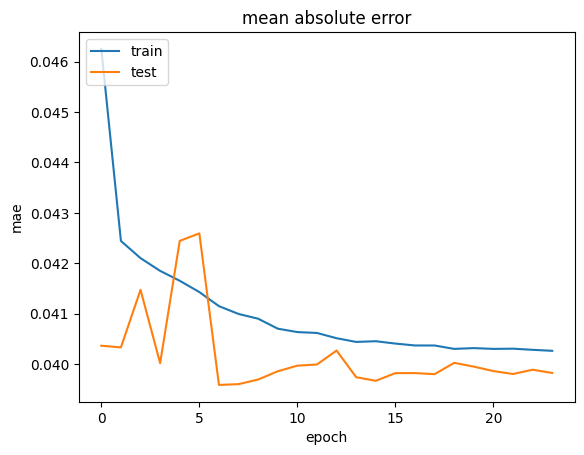

In [ ]:
plt.plot(hist_BiLSTM.history['mean_absolute_error'])
plt.plot(hist_BiLSTM.history['val_mean_absolute_error'])
plt.title('mean absolute error')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

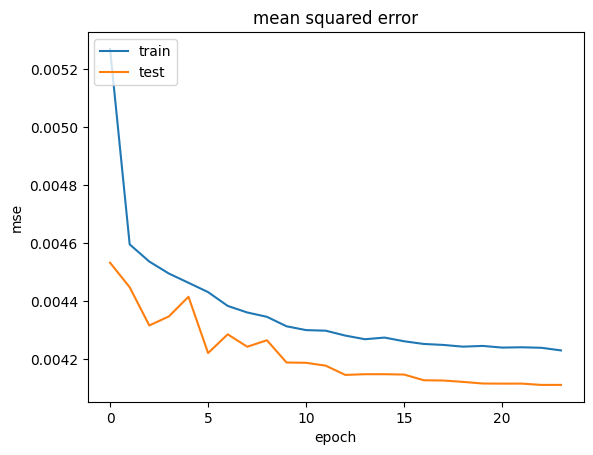

In [ ]:
plt.plot(hist_BiLSTM.history['mean_squared_error'])
plt.plot(hist_BiLSTM.history['val_mean_squared_error'])
plt.title('mean squared error')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

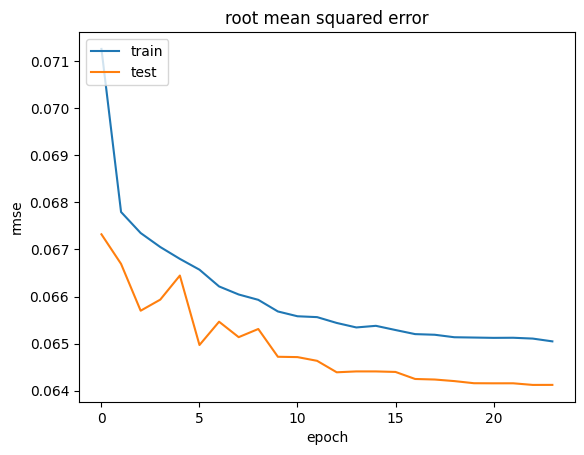

In [ ]:
plt.plot(hist_BiLSTM.history['root_mean_squared_error'])
plt.plot(hist_BiLSTM.history['val_root_mean_squared_error'])
plt.title('root mean squared error')
plt.ylabel('rmse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#**BiLSTM-CNN -**

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Bidirectional, LSTM

In [52]:
model_BiLSTMCNN = tf.keras.Sequential([
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(100, return_sequences=True), batch_input_shape=(batch_size,length, n_features)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Conv1D(filters=128, kernel_size=2, activation=tf.keras.layers.LeakyReLU(alpha=0.7)),
    tf.keras.layers.MaxPooling1D(pool_size=1),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1)
])
model_BiLSTMCNN.compile(optimizer=tf.keras.optimizers.Nadam(learning_rate=0.001),loss=tf.losses.MeanSquaredLogarithmicError(), metrics=[rmsle_custom, msle, mae, mse, rmse])
model_BiLSTMCNN.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_4 (Bidirectio  (64, 10, 200)            91200     
 nal)                                                            
                                                                 
 dropout (Dropout)           (64, 10, 200)             0         
                                                                 
 conv1d (Conv1D)             (64, 9, 128)              51328     
                                                                 
 max_pooling1d (MaxPooling1D  (64, 9, 128)             0         
 )                                                               
                                                                 
 flatten_1 (Flatten)         (64, 1152)                0         
                                                                 
 dense (Dense)               (64, 1)                 

In [57]:
model_BiLSTMCNN = tf.keras.Sequential([
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(100, return_sequences=True), batch_input_shape=(batch_size,length, n_features)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv1D(filters=64, kernel_size=3, padding='same', activation=tf.keras.layers.LeakyReLU(alpha=0.3)),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation=tf.keras.layers.LeakyReLU(alpha=0.3)),
    tf.keras.layers.Dense(1)
])

In [58]:
model_BiLSTMCNN.compile(optimizer=tf.keras.optimizers.Nadam(learning_rate=0.001),loss=tf.losses.MeanSquaredLogarithmicError(), metrics=[rmsle_custom, msle, mae, mse, rmse])
model_BiLSTMCNN.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_7 (Bidirectio  (64, 10, 200)            91200     
 nal)                                                            
                                                                 
 dropout_3 (Dropout)         (64, 10, 200)             0         
                                                                 
 conv1d_2 (Conv1D)           (64, 10, 64)              38464     
                                                                 
 max_pooling1d_2 (MaxPooling  (64, 5, 64)              0         
 1D)                                                             
                                                                 
 dropout_4 (Dropout)         (64, 5, 64)               0         
                                                                 
 flatten_5 (Flatten)         (64, 320)               

In [62]:
hist_BiLSTMCNN = model_BiLSTMCNN.fit(train_dataset,
                        validation_data = val_dataset, 
                        epochs=50,
                        batch_size=64, 
                        callbacks=[es,plateau],
                        verbose=1)

Epoch 1/50
4017/4017 [==============================] - 186s 46ms/step - loss: 0.0030 - rmsle_custom: 0.0537 - mean_squared_logarithmic_error: 0.0030 - mean_absolute_error: 0.0430 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0684 - val_loss: 0.0028 - val_rmsle_custom: 0.0519 - val_mean_squared_logarithmic_error: 0.0028 - val_mean_absolute_error: 0.0401 - val_mean_squared_error: 0.0044 - val_root_mean_squared_error: 0.0661 - lr: 0.0010
Epoch 2/50
4017/4017 [==============================] - 180s 45ms/step - loss: 0.0029 - rmsle_custom: 0.0526 - mean_squared_logarithmic_error: 0.0029 - mean_absolute_error: 0.0420 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0671 - val_loss: 0.0028 - val_rmsle_custom: 0.0513 - val_mean_squared_logarithmic_error: 0.0028 - val_mean_absolute_error: 0.0411 - val_mean_squared_error: 0.0043 - val_root_mean_squared_error: 0.0653 - lr: 0.0010
Epoch 3/50
4017/4017 [==============================] - 184s 46ms/step - loss: 0.0029 - rmsle_cu

In [63]:
yhat_BiLSTMCNN = model_BiLSTMCNN.predict(val_dataset)
for i in range(5):
    print(yhat_BiLSTMCNN[i])

1004/1004 [==============================] - 19s 18ms/step
[0.07914775]
[0.2150504]
[0.05323968]
[0.32068634]
[0.28493285]


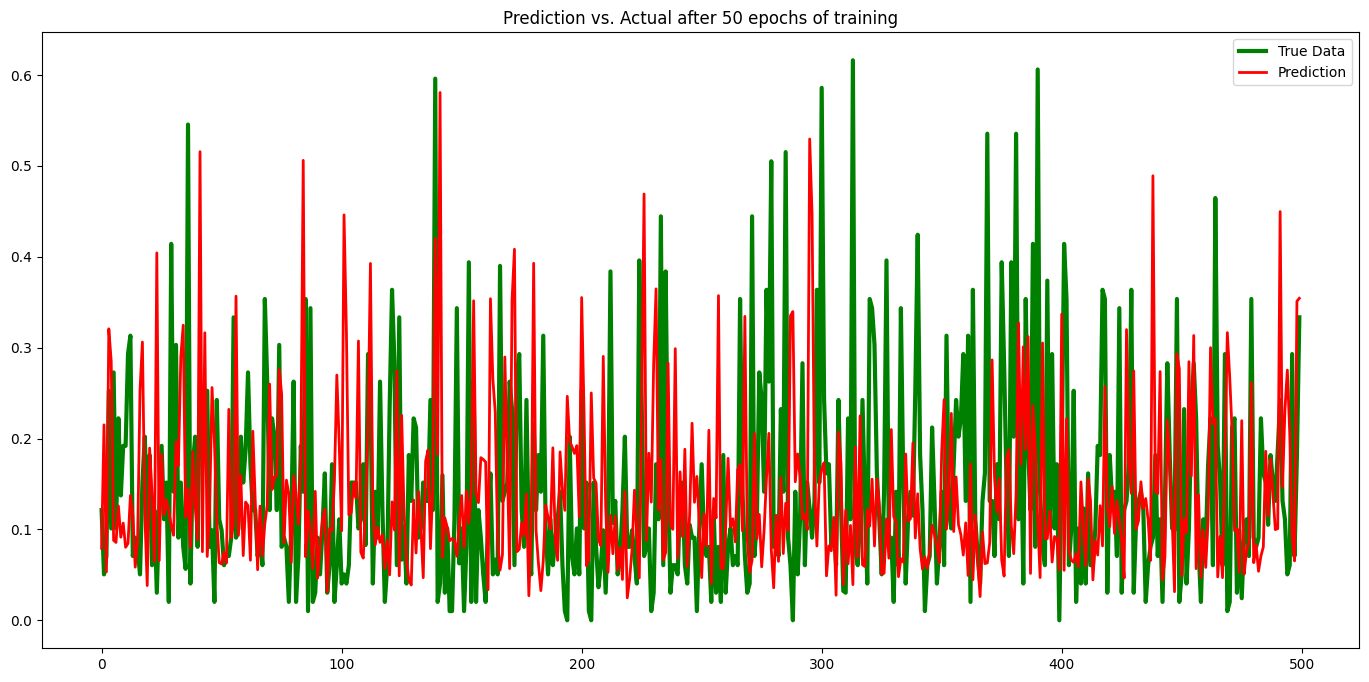

In [64]:
def plot_predicted(predicted_data, true_data):
    fig, ax = plt.subplots(figsize=(17,8))
    ax.set_title('Prediction vs. Actual after 50 epochs of training')
    ax.plot(true_data, label='True Data', color='green', linewidth='3')

    ax.plot(predicted_data, label='Prediction', color='red', linewidth='2')
    plt.legend()
    plt.show()

plot_predicted(yhat_BiLSTMCNN[:500,], Yval_scaled[:500,])

In [67]:
import math
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(Yval_scaled[:64252,], yhat_BiLSTMCNN[:64252,])
rmsle = rmsle_custom(Yval_scaled[:64252,], yhat_BiLSTMCNN[:64252,])
#msle = mean_squared_log_error(Yval_scaled[:64252,], yhat_BiLSTMCNN[:64252,])
mae = mean_absolute_error(Yval_scaled[:64252,], yhat_BiLSTMCNN[:64252,])
rmse = math.sqrt(mse)

print('Mean Squared Error: %.5f' % mse)
print('Root Mean Squared Logarithmic Error: %.5f' % rmsle)
#print('Mean Squared Logarithmic Error: %.5f' % msle)
print('Mean Absolute Error: %.5f' % mae)
print('Root Mean Squared Error: %.5f' % rmse)

Mean Squared Error: 0.02183
Root Mean Squared Logarithmic Error: 0.12086
Mean Absolute Error: 0.10545
Root Mean Squared Error: 0.14775


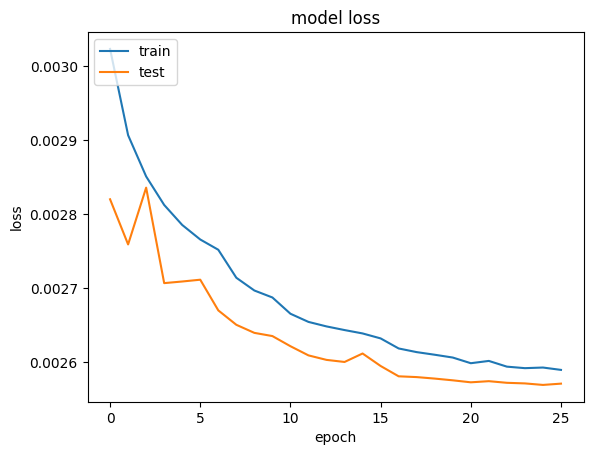

In [68]:
plt.plot(hist_BiLSTMCNN.history['loss'])
plt.plot(hist_BiLSTMCNN.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

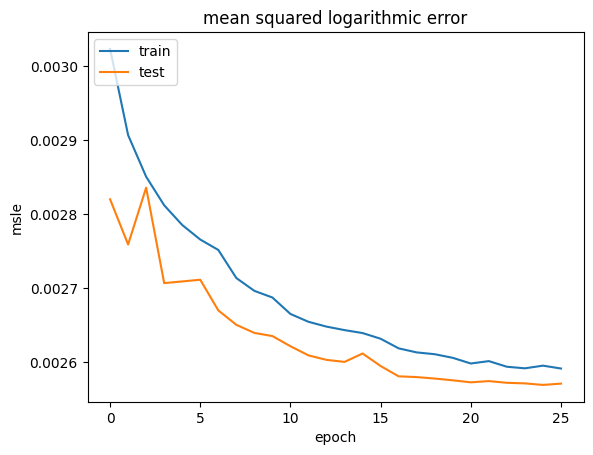

In [69]:
plt.plot(hist_BiLSTMCNN.history['mean_squared_logarithmic_error'])
plt.plot(hist_BiLSTMCNN.history['val_mean_squared_logarithmic_error'])
plt.title('mean squared logarithmic error')
plt.ylabel('msle')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

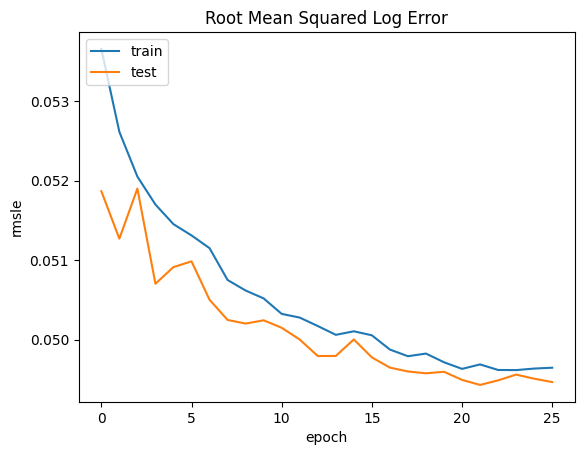

In [70]:
plt.plot(hist_BiLSTMCNN.history['rmsle_custom'])
plt.plot(hist_BiLSTMCNN.history['val_rmsle_custom'])
plt.title('Root Mean Squared Log Error')
plt.ylabel('rmsle')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

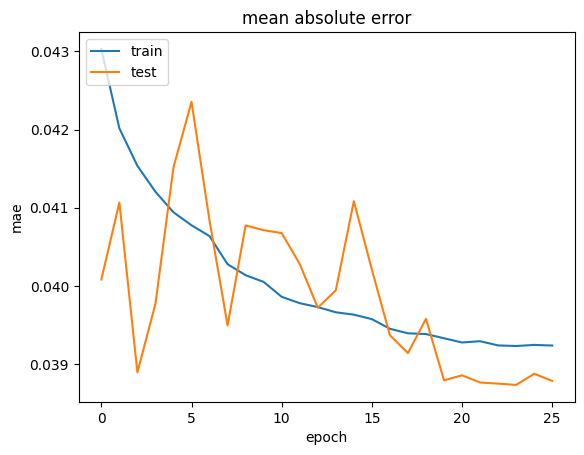

In [71]:
plt.plot(hist_BiLSTMCNN.history['mean_absolute_error'])
plt.plot(hist_BiLSTMCNN.history['val_mean_absolute_error'])
plt.title('mean absolute error')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

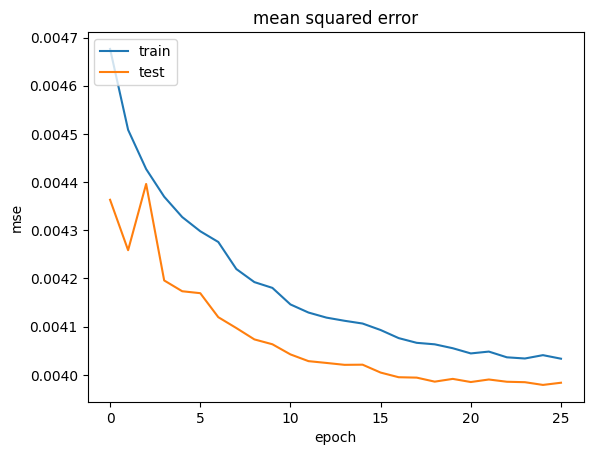

In [72]:
plt.plot(hist_BiLSTMCNN.history['mean_squared_error'])
plt.plot(hist_BiLSTMCNN.history['val_mean_squared_error'])
plt.title('mean squared error')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

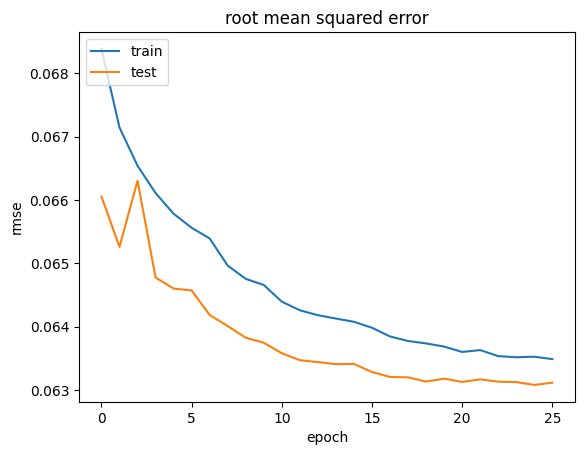

In [73]:
plt.plot(hist_BiLSTMCNN.history['root_mean_squared_error'])
plt.plot(hist_BiLSTMCNN.history['val_root_mean_squared_error'])
plt.title('root mean squared error')
plt.ylabel('rmse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show() 